In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Business challenge/requirement
BookRent is the largest online and offline book rental chain in India. The Company charges a fixed fee per month plus rental per book. So, the company makes more money when user rent more books.
You as an ML expert have to model recommendation engine so that user gets recommendation of books based on the behavior of similar users. This will ensure that users are renting books based on their individual taste.
Company is still unprofitable and is looking to improve both revenue and profit.

In [53]:
df1=pd.read_csv('c:\edureka\BX-Book-Ratings.csv', delimiter=",", encoding="latin-1")
df1.columns = ['userId', 'ISBN', 'bookRating']

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
userId        1048575 non-null int64
ISBN          1048575 non-null object
bookRating    1048575 non-null int64
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [55]:
df1.head()

,userId,ISBN,bookRating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [56]:
df2 = pd.read_csv('c:\edureka\BX-Users.csv', delimiter=",", encoding="latin-1")
df2.columns = ['userId', 'location', 'age']

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
userId      278859 non-null object
location    278858 non-null object
age         168096 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


In [58]:
df2.head()

,userId,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [74]:
df3 = pd.read_csv('c:\edureka\BX-Books.csv', delimiter=",", encoding="latin-1")
df3.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']

In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
ISBN                 271379 non-null object
bookTitle            271379 non-null object
bookAuthor           271378 non-null object
yearOfPublication    271379 non-null object
publisher            271377 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


In [61]:
df3.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [62]:
df1['bookRating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [63]:
df3.yearOfPublication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '\\"Freedom Song\\""',
       '1911', '1904', '1949', 'Frank Muir', '1932', '1928', '1929',
       '1927', '1931', '1914', '2050', '1934', '1910', 'ROBERT A. WILSON',
       '1933', '1902', 'Karen T. Whittenburg', '1924', '1921', '1900',
       '2038', '2026', 'George H. Scherr', '1944', '1917', '1901',
       'Salv

In [64]:
df3.loc[df3.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221691,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [65]:
df3.loc[df3.ISBN == '078946697X','yearOfPublication'] = 2000
df3.loc[df3.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
df3.loc[df3.ISBN == '078946697X','publisher'] = "DK Publishing Inc"

In [66]:
df3.loc[df3.ISBN == '0789466953', 'yearOfPublication'] = 2000
df3.loc[df3.ISBN == '0789466953', 'bookAuthor'] = "James Buckley"
df3.loc[df3.ISBN == '0789466953', 'publisher'] = "DK Publishing Inc"

In [73]:
df3.loc[df3.ISBN == '2070426769','yearOfPublication'] = 2003
df3.loc[df3.ISBN == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
df3.loc[df3.ISBN == '2070426769','publisher'] = 'Gallimard'

In [69]:
df3.loc[df3.yearOfPublication == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [77]:
df3=df3.replace({
    'yearOfPublication':'[A-Za-z]'
},0,regex=True)

In [78]:
df3.yearOfPublication = pd.to_numeric(df3.yearOfPublication)

In [79]:
sorted(df3['yearOfPublication'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [80]:
df3.loc[df3.yearOfPublication == 0,:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
641,345251733,Rainbow the Stormy Life of Judy Garland,Christopher Finch,0,Ballantine Books
646,590021117,Little House On the Prairie,Laura Ingall Wilder,0,Scholastic Inc
728,2070362388,Ravage,Rene Barjavel,0,Gallimard French
732,2266033689,Le Diable Au Corps,Raymond Radiguet,0,Presses Pocket French
735,2070334368,La Guerre Des Boutons,Pergaud,0,Livre de Poche


In [81]:
rating_book = pd.merge(df1, df3, on='ISBN')

In [82]:
rating_book.head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [83]:
all_ratings = pd.merge(rating_book, df2, on='userId')

In [84]:
all_ratings.head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
1,2313,812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
2,2313,679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
3,2313,60173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
4,2313,385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0


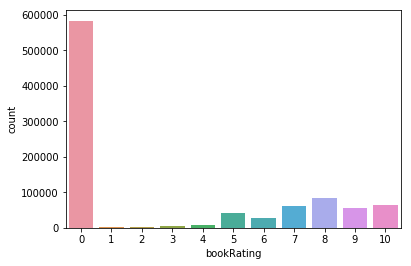

In [85]:
sns.countplot(all_ratings.bookRating)
plt.show()

In [86]:
#Segragating implicit and explict ratings datasets
ratings_explicit = all_ratings[all_ratings.bookRating != 0]
ratings_implicit = all_ratings[all_ratings.bookRating == 0]

In [87]:
ratings_implicit.head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
8,2313,449912558,0,The Sparrow,MARY DORIA RUSSELL,1997,Fawcett Books,"cincinnati, ohio, usa",23.0
11,2313,300069049,0,Cosima Wagner's Diaries: An Abridgement,Cosima Wagner,1997,Yale University Press,"cincinnati, ohio, usa",23.0
15,2313,375706771,0,Midwives: A Novel,Chris Bohjalian,1998,Vintage,"cincinnati, ohio, usa",23.0
20,2313,451525078,0,Don Quixote of LA Mancha,Miguel de Cervantes Saavedra,1990,Signet Classics,"cincinnati, ohio, usa",23.0
23,2313,553213601,0,Cyrano De Bergerac (Bantam Classics),EDMOND ROSTAND,1950,Bantam,"cincinnati, ohio, usa",23.0


In [88]:
ratings_explicit.head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
1,2313,812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
2,2313,679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
3,2313,60173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
4,2313,385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0


# Recommendations based on rating counts

In [89]:
rating_count=pd.DataFrame(ratings_explicit.groupby('ISBN')['bookRating'].count())

In [98]:
most_rate=rating_count.sort_values('bookRating',ascending=False).head()

In [99]:
most_rate

,bookRating
ISBN,
316666343,632
971880107,524
385504209,450
312195516,351
60928336,292


# The book with ISBN “316666343” received the most rating counts. 

In [105]:
ratings_explicit[ratings_explicit.ISBN=='316666343'].head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
666,23768,316666343,7,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown","st. louis, missouri, usa",45.0
3696,81977,316666343,7,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown","minneapolis, minnesota, usa",34.0
4023,98391,316666343,9,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown","morrow, georgia, usa",52.0
11480,128045,316666343,9,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown","clearwater, florida, usa",41.0
13086,168816,316666343,9,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown","santa clara, california, usa",35.0


# Recommendations based on correlations

In [107]:
avgrating_count=pd.DataFrame(ratings_explicit.groupby('ISBN')['bookRating'].mean())
avgrating_count['rating_count']=pd.DataFrame(ratings_explicit.groupby('ISBN')['bookRating'].count())

In [108]:
avgrating_count.sort_values('rating_count',ascending=False).head()

,bookRating,rating_count
ISBN,,
316666343,8.172468,632
971880107,4.438931,524
385504209,8.440000,450
312195516,8.159544,351
60928336,7.849315,292
